## Задача 2

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

__a)__

In [2]:
def P(n, k):
    prob = 1
    for i in range(1, k):
        prob *= (n - i)
    
    
    # Найдем все возможные последовательности
    arr = np.arange(1, k + 1)
    hlp = list(itertools.combinations_with_replacement(arr, 10 - k))
    
    # Посчитаем суммы всех возможных произведений элементов последовательности длины 10 - k
    prob *= np.sum(np.prod(hlp, axis=1)) / n**9
    
    return prob


# Создадим функцию для поиска оценки метода максимального правдоподобия как максимум функции правдоподобия
def ML_estimation(n_values, L_values):
    return n_values[np.argmax(L_values)]

In [3]:
n_values = range(6, 101)
L_values = [P(n, 6) for n in n_values]

In [4]:
# Найдем оценку метода максимального правдоподобия
n_hat_ML = ML_estimation(n_values, L_values)
n_hat_ML

8

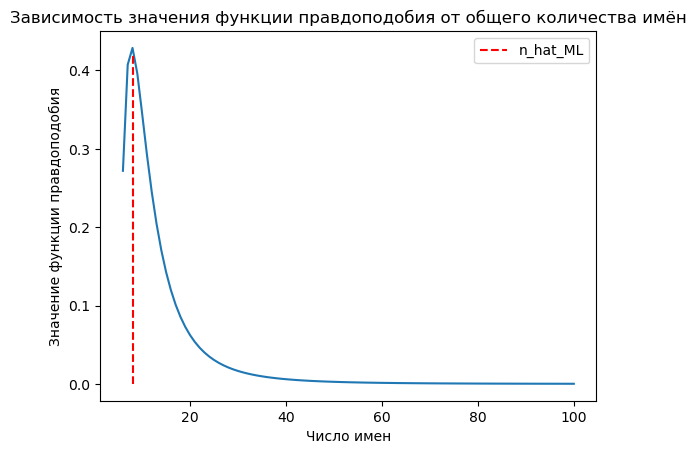

In [5]:
# Построим график функции правдоподобия в зависимости от числа имен
plt.plot(n_values, L_values)
plt.vlines(n_hat_ML, 0, 0.42, linestyles='dashed', color='red', label='n_hat_ML')

plt.title('Зависимость значения функции правдоподобия от общего количества имён')
plt.xlabel('Число имен')
plt.ylabel('Значение функции правдоподобия')
plt.legend();

__б)__

In [6]:
# Создадим функцию для подсчета мат. ожидания
def E(n):
    E = 0
    for k in range(1, 11):
        E += k * P(n, k)

    return E


# Создадим функцию для поиска оценки метода моментов
def MM_estimation(n_values, k):
    deltas = [np.abs(E(n) - k) for n in n_values]
    return n_values[np.argmin(deltas)]

In [7]:
n_values = range(6, 101)
Es = [E(n) for n in n_values]

In [8]:
# Найдем оценку метода моментов
n_hat_MM = MM_estimation(n_values, 6)
n_hat_MM

8

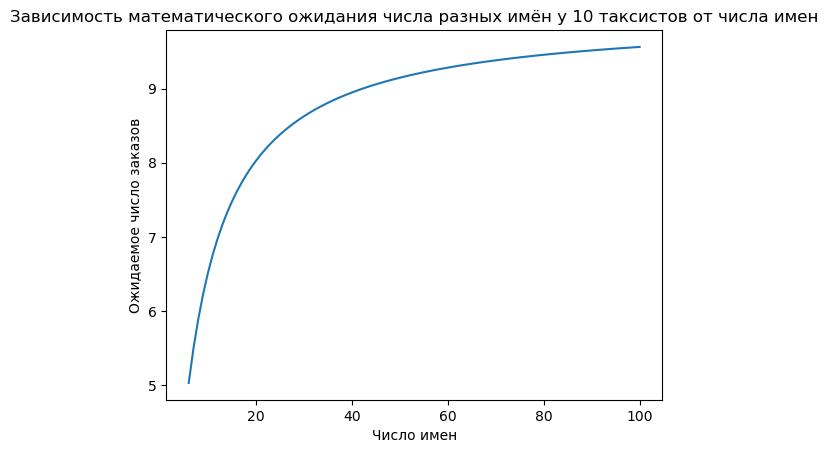

In [9]:
# Построим график зависимости математического ожидания числа уникальных имен на десятом заказазе
plt.plot(n_values, Es)

plt.xlabel('Число имен')
plt.ylabel('Ожидаемое число заказов')
plt.title('Зависимость математического ожидания числа разных имён у 10 таксистов от числа имен');

__в)__

In [10]:
# Симмулируем заказ
def order(i):
    np.random.seed(i)
    # Присвоим каждому таксисту номер
    names = np.arange(1, 21)
    
    order_history = np.random.choice(names, size=10)

    return len(np.unique(order_history))

In [11]:
orders = [order(i) for i in range(10**4)]

In [12]:
def P(n, k):
    prob = 1
    for i in range(1, k):
        prob *= (n - i)
    
    
    # Найдем все возможные последовательности
    arr = np.arange(1, k + 1)
    hlp = list(itertools.combinations_with_replacement(arr, 10 - k))
    
    # Посчитаем суммы всех возможных произведений элементов последовательности длины 10 - k
    prob *= np.sum(np.prod(hlp, axis=1)) / n**9
    
    return prob


# Создадим функцию для подсчета мат. ожидания
def E(n):
    E = 0
    for k in range(1, 11):
        E += k * P(n, k)

    return E


# Создадим функцию для поиска оценки метода максимального правдоподобия как максимум функции правдоподобия
def ML_estimation(n_values, L_values):
    return n_values[np.argmax(L_values)]


# Создадим функцию для поиска оценки метода моментов
def MM_estimation(n_values, k):
    deltas = [np.abs(E(n) - k) for n in n_values]
    return n_values[np.argmin(deltas)]

In [13]:
ML_estimations = []

for k in orders:
    n_values = range(k, 101)
    L_values = [P(n, k) for n in n_values]
    n_hat_ML = ML_estimation(n_values, L_values)
    ML_estimations.append(n_hat_ML)

In [14]:
# Оценим смещение
np.mean(ML_estimations) - 20

7.6234

In [15]:
# Оценим дисперсию
np.var(ML_estimations, ddof=1)

495.4729197319731

In [16]:
# Оценим среднеквадратичную ошибку
ML_estimations = np.array(ML_estimations)

np.sum((ML_estimations - 20)**2 / len(ML_estimations))

553.5396

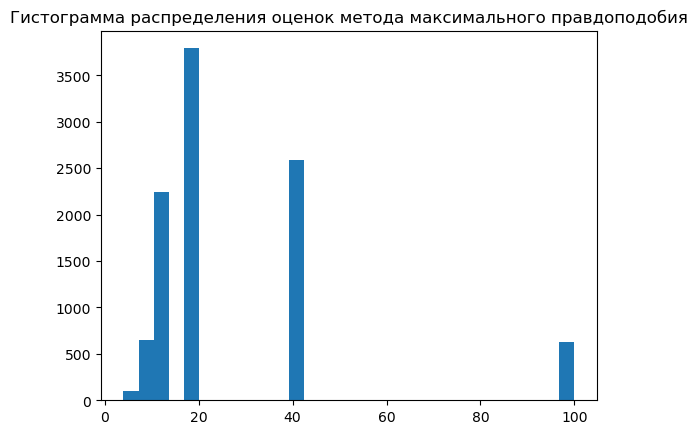

In [17]:
# Построим гистограмму для оценок метода максимального правдоподобия
plt.hist(ML_estimations, bins=30)

plt.title('Гистограмма распределения оценок метода максимального правдоподобия');

In [18]:
MM_estimations = []

for k in orders:
    # Ограничим n сотней
    n_values = range(k, 101)
    n_hat_MM = MM_estimation(n_values, k)
    MM_estimations.append(n_hat_MM)

In [19]:
# Оценим смещение
np.mean(MM_estimations) - 20

8.011800000000001

In [20]:
# Оценим дисперсию
np.var(MM_estimations, ddof=1)

488.7507358335834

In [21]:
# Оценим среднеквадратичную ошибку
MM_estimations = np.array(MM_estimations)

np.sum((MM_estimations - 20)**2 / len(MM_estimations))

552.8907999999999

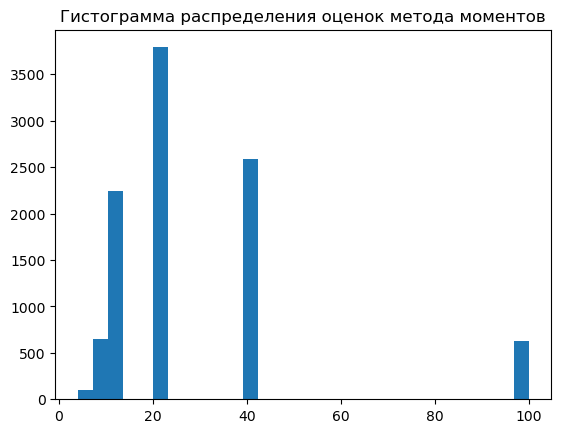

In [22]:
# Построим гистограмму для оценок метода моментов
plt.hist(MM_estimations, bins=30)

plt.title('Гистограмма распределения оценок метода моментов');